In [719]:
import numpy as np
import matplotlib.pyplot as plt

### 生成虚拟数据：$$y = 2 X^2 + 3X + 1$$

In [720]:
def generate_data(n_samples = 100, noise_level = 3):
    np.random.seed(42)
    X = np.linspace(-5, 5, n_samples)
    y_true = 2 * X**2 + 3 * X + 1
    noise = np.random.normal(0, noise_level, n_samples)
    y_noise = y_true + noise
    return X, y_noise, y_true

In [721]:
X, y_noise, y_true = generate_data()

In [722]:
print(f"First 3 values of X: {X[:3]}")
print(f"First 3 values of y_noise: {y_noise[:3]}")

First 3 values of X: [-5.        -4.8989899 -4.7979798]
First 3 values of y_noise: [37.49014246 33.88844146 34.5903465 ]


In [723]:
def plot_data(X, y):
    plt.scatter(X, y, color = "blue", label = "Data points")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Actual Data")
    plt.grid(True)
    plt.legend()
    plt.show()


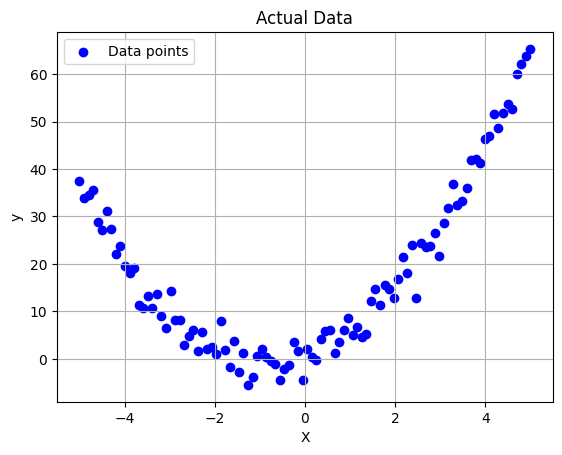

In [724]:
plot_data(X, y_noise)

### 特征工程：生成多项式特征

将原本$x$，转为$x, x^2$

In [725]:
def polynomial_features(X, degree = 2):
    X_poly = np.column_stack([X ** i for i in range(degree + 1)])
    return X_poly


In [726]:
X_poly = polynomial_features(X, degree = 2) # [c x x^2]


### 梯度下降

In [727]:
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1 / 2 * m) * np.sum((predictions - y) ** 2)
    return loss

In [728]:
def gradient_descent(X, y, theta, learning_rate = 0.01, iterations = 1000):
    m = len(y)
    cost_history = []
    theta_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * (X.T).dot(errors)
        theta -= learning_rate * gradient
        
        cost = compute_loss(X, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, cost_history, theta_history


In [729]:
theta = np.zeros(X_poly.shape[1])
theta_final, loss_history, theta_history = gradient_descent(X_poly, y_noise, theta)

#### 损失函数

In [730]:
def plot_loss_history(loss_history):
    plt.figure(figsize=(5, 5))
    plt.plot(loss_history, c = "r", linewidth = 3)
    plt.title("Loss function")
    plt.xlabel("Iterations")
    plt.ylabel("Loss value")
    plt.show()

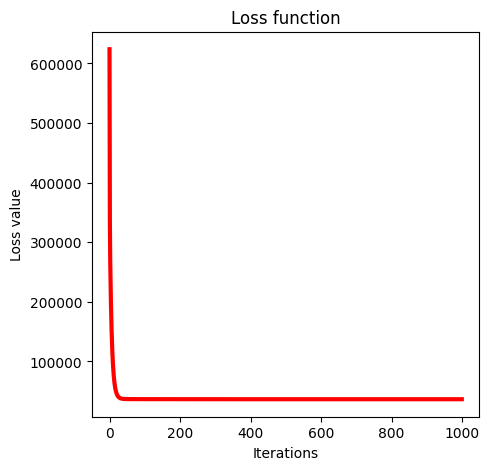

In [731]:
plot_loss_history(loss_history)

In [732]:
def parameter_plot(theta_history):
    plt.figure(figsize = (10, 7))
    theta_history = np.array(theta_history)

    labels = ["Constant Term", "Linear Term", "Quadratic Term"]
    for i in range(theta_history.shape[1]):
        plt.plot(theta_history[:, i], linewidth = 4, label = labels[i])

    plt.title("Parameter Values Over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Parameter Values")
    plt.grid(True)
    plt.legend()
    plt.show()


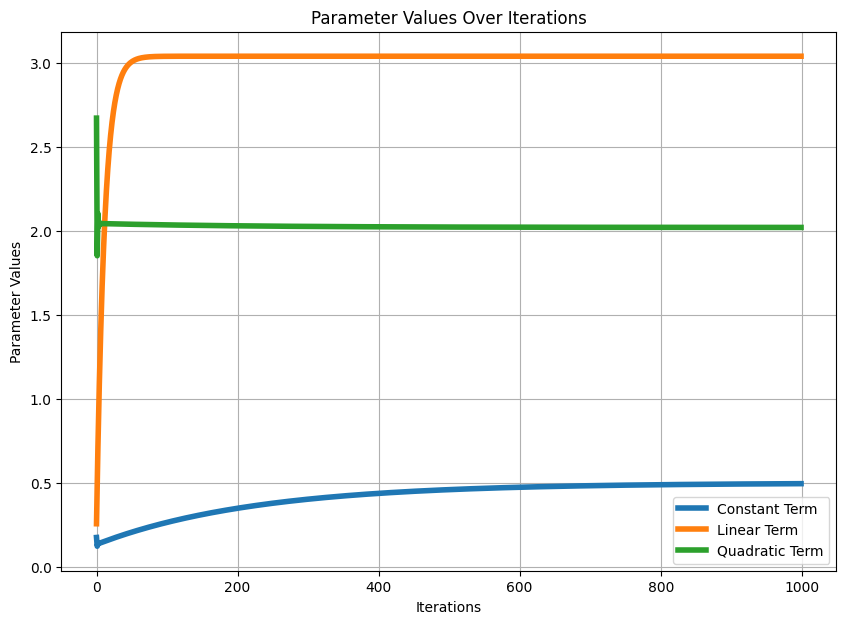

In [733]:
parameter_plot(theta_history)

#### 拟合图形

In [734]:
def plot_fit_result(X, y, X_poly, theta_final):
    plt.figure(figsize = (8, 6))

    plt.scatter(X, y, color = "blue", label = "Actual Data")

    y_pred = X_poly.dot(theta_final)
    plt.plot(X, y_pred, color = "red", linewidth = 3, label = f"y = {theta_final[0]:.2f} + {theta_final[1]:.2f}x + {theta_final[2]:.2f}x^2")
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Polynomial Regression")
    plt.grid(True)
    plt.legend()
    plt.show()


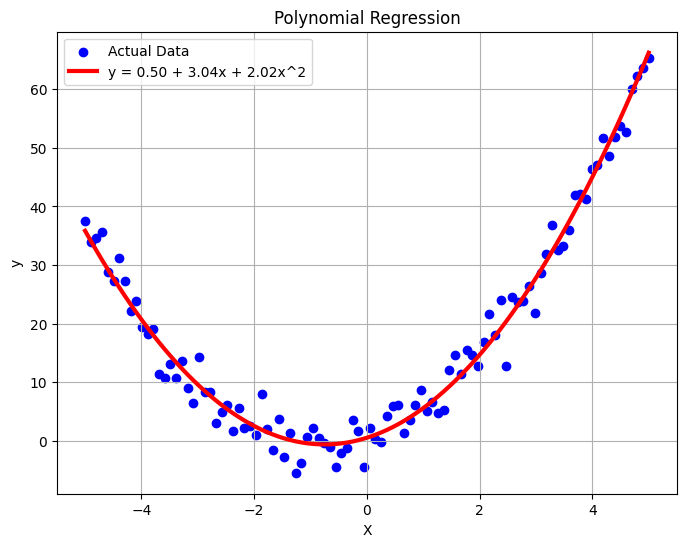

In [735]:
plot_fit_result(X, y_noise, X_poly, theta_final)

In [736]:
print(f"Fitted Parameters: \n Constant = {theta_final[0]:.2f} \n x's coefficients = {theta_final[1]:.2f} \n x^2's coefficients = {theta_final[2]:.2f}")

Fitted Parameters: 
 Constant = 0.50 
 x's coefficients = 3.04 
 x^2's coefficients = 2.02
